## 训练第一个神经网络：基本分类

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


### 导入数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 探索数据

In [55]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(len(train_labels))

60000


In [5]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
print(test_images.shape)

(10000, 28, 28)


In [9]:
print(len(test_labels))

10000


In [11]:
print(test_labels)

[9 2 1 ... 8 1 5]


### 预处理数据

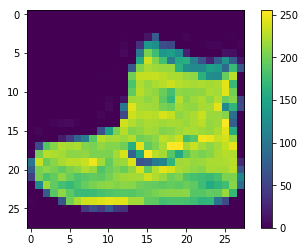

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

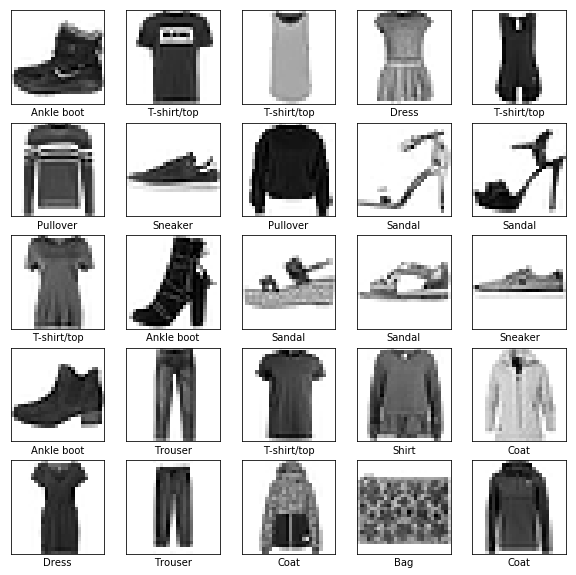

In [29]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 构建与训练模型

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4966 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3762 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3370 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3129 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2938 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2780 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2658 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2550 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2454 - accuracy: 0.9079
Epoch 10/10
60000/60000 [============

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy: ', test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3420 - accuracy: 0.8845

Test accuracy:  0.8845


### 预测

In [38]:
predictions = model.predict(test_images)

predictions[0]

array([1.9848918e-07, 6.2967965e-06, 1.2487946e-07, 4.5386751e-06,
       1.3287071e-06, 3.8301453e-02, 5.6206454e-07, 6.0179353e-02,
       6.4673060e-07, 9.0150553e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

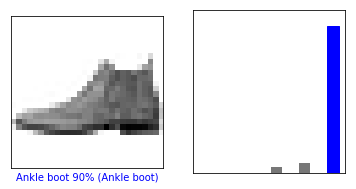

In [43]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

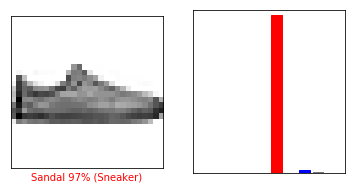

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

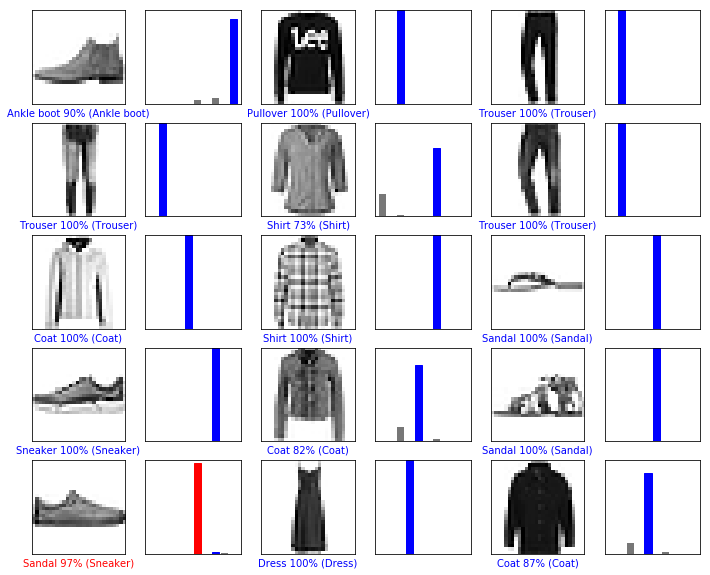

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [47]:
img = test_images[0]

print(img.shape)

(28, 28)


In [49]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.9848956e-07 6.2967965e-06 1.2487935e-07 4.5386710e-06 1.3287057e-06
  3.8301427e-02 5.6206505e-07 6.0179342e-02 6.4673003e-07 9.0150553e-01]]


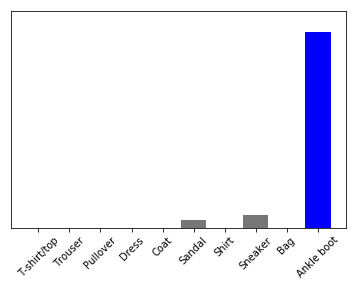

In [52]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

9